In [ ]:
import pandas as pd
import owlready2 as owlr 
#https://pythonhosted.org/Owlready/
import rdflib
from rdflib import URIRef, Literal
from rdflib.namespace import RDF, RDFS
from rdflib import Namespace

from collections import Counter
import uuid

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

import networkx as nx
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

In [2]:
raw_world = owlr.World(filename='raw_world.sqlite3')
rawdms = raw_world.get_ontology("datamodels_rdf.owl").load()
DMNS = Namespace("datamodels_rdf.owl")
onto = rawdms

In [3]:
DMNS.DataModel

rdflib.term.URIRef('datamodels_rdf.owlDataModel')

In [4]:
onto_dataproperties = list(onto.data_properties())
onto_individuals = list (onto.individuals())
individuals = [(i, i.is_a.first()) for i in onto_individuals + onto_dataproperties]
serializations = [i[0] for i in individuals if i[1] == onto.Serialization]

for s in serializations:
    print(s)
    mappings = [m for m in s.SerializationContainsMapping] 
    for m in mappings:
        print ("\t", m, m.is_a)

datamodels_rdf.DomainModelClassEntityRecord
	 datamodels_rdf.AttributeMapping [datamodels_rdf.Mapping]
	 datamodels_rdf.ClassMapping [datamodels_rdf.Mapping]
	 datamodels_rdf.DomainMapping [datamodels_rdf.Mapping]
	 datamodels_rdf.ModelMapping [datamodels_rdf.Mapping]
	 datamodels_rdf.hasAttributeMapping [datamodels_rdf.Mapping]
	 datamodels_rdf.hasClassMapping [datamodels_rdf.Mapping]
	 datamodels_rdf.hasDataTypeMapping [datamodels_rdf.Mapping]
	 datamodels_rdf.hasModelMapping [datamodels_rdf.Mapping]
	 datamodels_rdf.hasModelTypeMapping [datamodels_rdf.Mapping]


In [5]:
with onto:
    owlr.sync_reasoner(raw_world)

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmpv17v7lpy
* Owlready2 * HermiT took 0.7050328254699707 seconds
* Owlready * Reparenting datamodels_rdf.ModelContainsRelationship: {datamodels_rdf.HierarchicalRelations, owl.ObjectProperty} => {datamodels_rdf.HierarchicalRelations}
* Owlready * Reparenting datamodels_rdf.ModelContainsClass: {datamodels_rdf.HierarchicalRelations, owl.ObjectProperty} => {datamodels_rdf.HierarchicalRelations}
* Owlready * Reparenting datamodels_rdf.ModelDomainContainsModel: {datamodels_rdf.HierarchicalRelations, owl.ObjectProperty} => {datamodels_rdf.HierarchicalRelations}
* Owlready * Reparenting datamodels_rdf.IdentityAttributeParentClass: {owl.ObjectProperty, datamodels_rdf.IdentityParent} => {dat

In [6]:
mapped_things = [(c,c.MappingKey,"class") for c in onto.classes() if len(c.MappingKey) > 0] + \
                [(p, p.MappingKey,"data") for p in onto.data_properties() if len(p.MappingKey) > 0] + \
                [(p, p.MappingKey,"object") for p in onto.object_properties() if len(p.MappingKey) > 0] 
mappable_things = {vv:k for k,v,t in mapped_things for vv in v}
mappable_things_ext = {vv:(k,t) for k,v,t in mapped_things for vv in v}
assert all([v==1 for v in Counter([b for c in mapped_things for b in c[1]]).values()])
#del mapped_things
#mappable_things
mappable_things_ext

{'Class': (datamodels_rdf.Class, 'class'),
 'Attribute': (datamodels_rdf.Attribute, 'class'),
 'Relationship': (datamodels_rdf.Relationship, 'class'),
 'DataModel': (datamodels_rdf.DataModel, 'class'),
 'Domain': (datamodels_rdf.ModelDomain, 'class'),
 'Serialization': (datamodels_rdf.Serialization, 'class'),
 'Mapping': (datamodels_rdf.Mapping, 'class'),
 'Context': (datamodels_rdf.Context, 'class'),
 'DataType': (datamodels_rdf.DataType, 'data'),
 'hasDataType': (datamodels_rdf.DataType, 'data'),
 'ModelType': (datamodels_rdf.ModelType, 'data'),
 'hasModelType': (datamodels_rdf.ModelType, 'data'),
 'hasModelType_obsolete': (datamodels_rdf.ModelTypeCode, 'data'),
 'hasAttribute': (datamodels_rdf.ClassHasAttribute, 'object'),
 'hasClass': (datamodels_rdf.ModelContainsClass, 'object'),
 'isAttributeParent': (datamodels_rdf.IdentityAttributeParentClass, 'object'),
 'isClassParent': (datamodels_rdf.IdentityClassParentModel, 'object'),
 'isRelationshipParent': (datamodels_rdf.IdentityRelat

In [7]:
mapped_things

[(datamodels_rdf.Class, ['Class'], 'class'),
 (datamodels_rdf.Attribute, ['Attribute'], 'class'),
 (datamodels_rdf.Relationship, ['Relationship'], 'class'),
 (datamodels_rdf.DataModel, ['DataModel'], 'class'),
 (datamodels_rdf.ModelDomain, ['Domain'], 'class'),
 (datamodels_rdf.Serialization, ['Serialization'], 'class'),
 (datamodels_rdf.Mapping, ['Mapping'], 'class'),
 (datamodels_rdf.Context, ['Context'], 'class'),
 (datamodels_rdf.DataType, ['DataType', 'hasDataType'], 'data'),
 (datamodels_rdf.ModelType, ['ModelType', 'hasModelType'], 'data'),
 (datamodels_rdf.ModelTypeCode, ['hasModelType_obsolete'], 'data'),
 (datamodels_rdf.ClassHasAttribute, ['hasAttribute'], 'object'),
 (datamodels_rdf.ModelContainsClass, ['hasClass'], 'object'),
 (datamodels_rdf.IdentityAttributeParentClass,
  ['isAttributeParent'],
  'object'),
 (datamodels_rdf.IdentityClassParentModel, ['isClassParent'], 'object'),
 (datamodels_rdf.IdentityRelationshipParentModel,
  ['isRelationshipParent'],
  'object'),
 (

In [8]:
mapping_data = {}
for s in serializations:
    mapping_data[s.name]={}
    mappings = [m for m in s.SerializationContainsMapping] 
    for m in mappings:
        mapping_data[s.name][m.name]={}
        for p in m.get_properties():
            mapping_data[s.name][m.name][p.name]=p[m].first()
    

In [9]:
mapping_data['DomainModelClassEntityRecord']['AttributeMapping']

{'MappingRange': 'Attribute',
 'MappingLabel': 'Attribute',
 'MappingSubType': 'Entity',
 'SerializationLabel': 'Attribute'}

In [10]:
data_rows = [{ "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "PersonID", 
             "DataType" : "string"}]

In [114]:
def gen_temp_entity_triples_from_row(s_mappings, onto_map, namespace, row):
    object_triples=[]
    for m_key, m_d in mapping_data['DomainModelClassEntityRecord'].items():
        #print(m_key, m_d)
        if m_d['MappingSubType']=="Entity":
#            print("Create Temporary Entity")
            if m_d['SerializationLabel'] in row:
                data = row[m_d['SerializationLabel']]
                e_type = onto_map[m_d['MappingLabel']]
#                print(e_type[0], ":", data)
                key = uuid.uuid4().hex
                thing_URI = URIRef(key, namespace)
                # RDF:type, RDFS:label
                props = { RDF.type : URIRef(e_type[0].iri), 
                          RDFS.label : Literal(data)}

                for k,v in props.items():
                    object_triples.append((thing_URI, k, v))
#                print()
    # Create a graph containing the newly created object_triples
    row_g = rdflib.Graph()

    for triple in object_triples:
#        print(triple)
        row_g.add(triple)
        
    property_triples=[]
    for m_key, m_d in mapping_data['DomainModelClassEntityRecord'].items():
        #print(m_key, m_d)
        if m_d['MappingSubType']=="Property":
#            print("Create Property Link")
            if m_d['SerializationLabel'] in row:
                data = row[m_d['SerializationLabel']] # Get the value in the row - normally the target object label
                prop = onto_map[m_d['MappingLabel']][0] # Get the property being referenced
                prop_domain = onto_map[m_d['MappingDomain']][0] # Get the domain class (used for search in the graph)
                prop_range = onto_map[m_d['MappingRange']][0] # Get the range class (used for search)
                prop_type = onto_map[m_d['MappingRange']][1]
#                print("!", prop, prop_domain, prop_range, prop_type)
                prop_iri = URIRef(prop.iri)
                subj_node = get_thing_from_label_graphsearch(row_g, prop_domain, search_key=None)[0]
                if prop_type == "class":
                    obj_node = get_thing_from_label_graphsearch(row_g, prop_range, search_key=data)[0]
                elif prop_type == "data" : 
                    obj_node = Literal(data)
#                print ("triple", subj_node, prop_iri, obj_node)
                property_triples.append((subj_node, prop_iri, obj_node))

    for triple in property_triples:
#        print(triple)
        row_g.add(triple)
    
    
    
    return row_g


def t2rdflibg(triples): #triples to rdflib graph
    g = rdflib.Graph()
    for t in triples:
        g.add(t)
    return g

def get_key_values(g, key=RDFS.label, invert=False):
    if not invert:
        return list([(s, o.value) for s,p,o in g.triples((None, key, None))])
    else:
        return list([(o.value,s) for s,p,o in g.triples((None, key, None))])
    
    

def get_thing_from_label_graphsearch(graph, domain, search_key=None):
    #sd_list = [c for c in list(space.classes()) if c==domain]
    
    sd_list = [s for s,p,o in graph.triples((None, RDF.type, URIRef(domain.iri)))]
#    print("sd_list:", sd_list)
    # Get instances of classes that match provided keys
    if search_key is None:
        c_s = [s for s in sd_list]
    else:
        c_s = [s for l in sd_list for s,p,o in graph.triples((None, RDFS.label, Literal(search_key)))]
    
    return c_s

def text_process(text):
    return text.lower().replace(" ", "_")

# Traverse a graph g, from some source s and generate a list of all precursor items.
def nx_walk_predecessors(g,s,l=None,invert=False,process=None):
    if l is None:
        l=[]
    nxt=list(ng.predecessors(s))

    if process is None:
        p_s=s
    else:
        p_s=process(s)
        
    if len(nxt)>0:

        l.extend([p_s])            

        for n in nxt:

            nx_walk_predecessors(g,n,l,process=process)
    else:
        l.extend([p_s])     
    if invert:
        return l[::-1]
    else:
        return l



In [115]:
mappable_things_ext

{'Class': (datamodels_rdf.Class, 'class'),
 'Attribute': (datamodels_rdf.Attribute, 'class'),
 'Relationship': (datamodels_rdf.Relationship, 'class'),
 'DataModel': (datamodels_rdf.DataModel, 'class'),
 'Domain': (datamodels_rdf.ModelDomain, 'class'),
 'Serialization': (datamodels_rdf.Serialization, 'class'),
 'Mapping': (datamodels_rdf.Mapping, 'class'),
 'Context': (datamodels_rdf.Context, 'class'),
 'DataType': (datamodels_rdf.DataType, 'data'),
 'hasDataType': (datamodels_rdf.DataType, 'data'),
 'ModelType': (datamodels_rdf.ModelType, 'data'),
 'hasModelType': (datamodels_rdf.ModelType, 'data'),
 'hasModelType_obsolete': (datamodels_rdf.ModelTypeCode, 'data'),
 'hasAttribute': (datamodels_rdf.ClassHasAttribute, 'object'),
 'hasClass': (datamodels_rdf.ModelContainsClass, 'object'),
 'isAttributeParent': (datamodels_rdf.IdentityAttributeParentClass, 'object'),
 'isClassParent': (datamodels_rdf.IdentityClassParentModel, 'object'),
 'isRelationshipParent': (datamodels_rdf.IdentityRelat

In [116]:
row_graph = gen_temp_entity_triples_from_row(mapping_data, mappable_things_ext, "http://temp", data_rows[0])




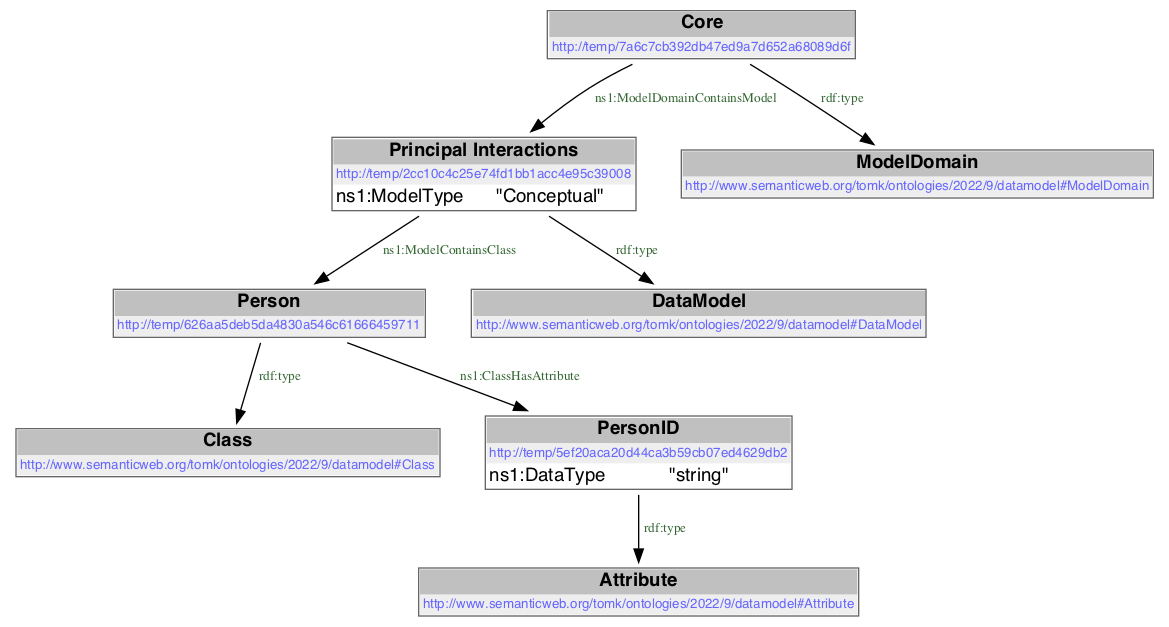

In [117]:
visualize(row_graph)

In [118]:
# connect additional context to row-graph
row_graph.parse ("datamodels_rdf.owl", format='xml')
dmns = rdflib.Namespace(onto.base_iri)
row_graph.bind('dm', dmns)
row_graph.bind('rdfs', RDFS)


In [119]:

# Get container tree
row_hierarchy_sparql="""SELECT distinct ?sl ?ol
WHERE

{

     {?s ?p ?o .
     ?p rdfs:subPropertyOf dm:HierarchicalRelations.
     ?s rdfs:label ?sl .
     ?o rdfs:label ?ol .    
     }
     
     }
 
 """

get_s_nodes="""
SELECT ?s ?q ?l
WHERE
    {
    ?s ?p ?o.
    ?o rdfs:subClassOf dm:Definition.
    BIND ( rdf:type as ?p )
    BIND ( dm:UniqueIdentifier as ?q)
    ?s rdfs:label ?l
    }

"""

ng = nx.DiGraph()
c_tree = list(row_graph.query(row_hierarchy_sparql, initNs={'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}))
print(c_tree)
for e in [(e[0].value, e[1].value)  for e in c_tree ]:
    ng.add_edge(*e)

source = [n for n,d in  ng.out_degree() if d==0][0]
print(source)
print (nx.nodes(ng))
list(ng.predecessors(source))



for uri, prop, lab in list(row_graph.query(get_s_nodes, initNs={'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF})):
    print(uri, prop, ".".join(nx_walk_predecessors(ng,lab.value,invert=True,process=text_process)))

[(rdflib.term.Literal('Person'), rdflib.term.Literal('PersonID')), (rdflib.term.Literal('Core'), rdflib.term.Literal('Principal Interactions')), (rdflib.term.Literal('Principal Interactions'), rdflib.term.Literal('Person'))]
PersonID
['Person', 'PersonID', 'Core', 'Principal Interactions']
http://temp/5ef20aca20d44ca3b59cb07ed4629db2 http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#UniqueIdentifier core.principal_interactions.person.personid
http://temp/626aa5deb5da4830a546c61666459711 http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#UniqueIdentifier core.principal_interactions.person
http://temp/7a6c7cb392db47ed9a7d652a68089d6f http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#UniqueIdentifier core
http://temp/2cc10c4c25e74fd1bb1acc4e95c39008 http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#UniqueIdentifier core.principal_interactions


In [120]:
".".join(nx_walk_predecessors(ng,source,invert=True,process=text_process))

'core.principal_interactions.person.personid'

(rdflib.term.URIRef('http://temp/1c30954273fe43b790a3e966e9aee784'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelContainsClass'), rdflib.term.URIRef('http://temp/ad21d37f44544e748f373c14f4564945'))

(rdflib.term.URIRef('http://temp/ad21d37f44544e748f373c14f4564945'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ClassHasAttribute'), rdflib.term.URIRef('http://temp/3213618d06ee403ea3fe7e31a0b1af57'))

(rdflib.term.URIRef('http://temp/a266ac7a2c4c41619828fe686668cc90'), rdflib.term.URIRef('http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#ModelDomainContainsModel'), rdflib.term.URIRef('http://temp/1c30954273fe43b790a3e966e9aee784'))

(rdflib.term.URIRef('http://temp/1c30954273fe43b790a3e966e9aee784'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Principal Interactions'))

(rdflib.term.URIRef('http://temp/ad21d37f44544e748f373c14f4564945'), rdflib.term.URIRef('htt

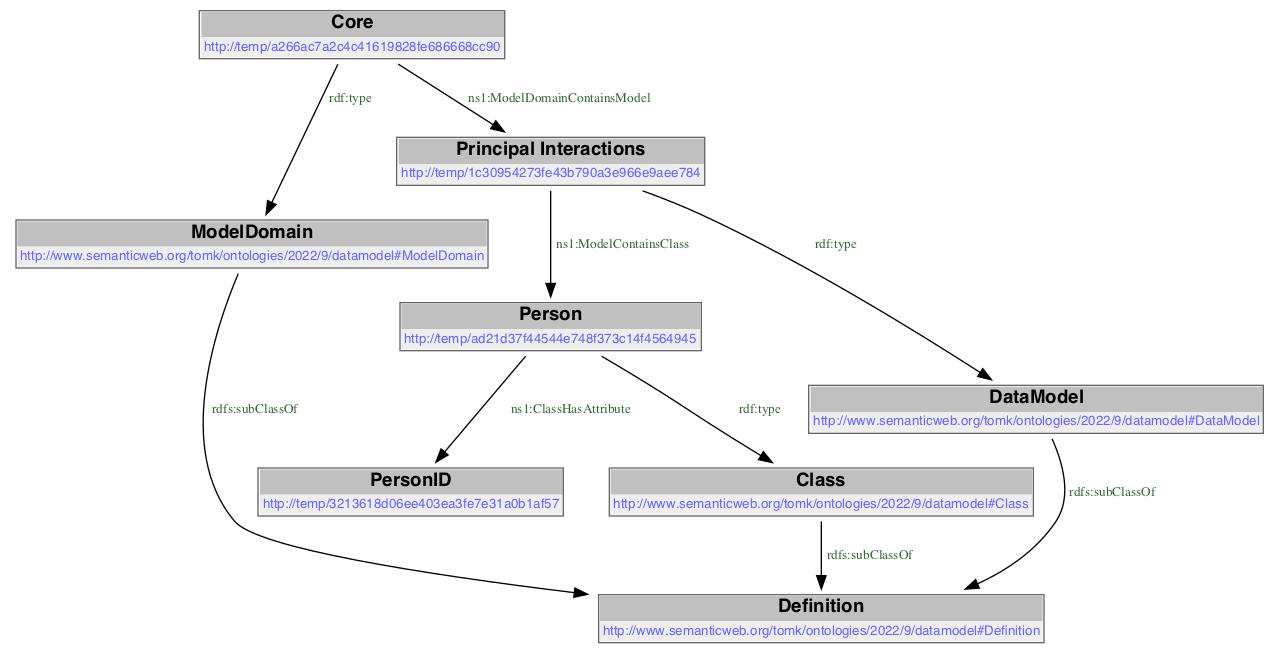

In [49]:
q="""SELECT distinct ?s ?p ?o
WHERE
    {?s ?p ?o .
     ?p rdfs:subPropertyOf dm:HierarchicalRelations.}
 
 """


q="""SELECT distinct ?s ?p ?o
WHERE

{
    {?s ?p ?o .
     ?p rdfs:subPropertyOf dm:HierarchicalRelations.}
     UNION
    {?s ?h ?q .
     ?h rdfs:subPropertyOf dm:HierarchicalRelations.
     BIND (rdfs:label as ?p)
    ?s rdfs:label ?o}
     UNION
    {?q ?h ?s .
     ?h rdfs:subPropertyOf dm:HierarchicalRelations.
     BIND (rdfs:label as ?p)
    ?s rdfs:label ?o}
     UNION
    {?s ?h ?q .
     ?h rdfs:subPropertyOf dm:HierarchicalRelations.
     BIND (rdf:type as ?p)
     ?s rdf:type ?o .
     }
     UNION
    {?a ?h ?b .
     ?h rdfs:subPropertyOf dm:HierarchicalRelations.
     ?a rdf:type ?s .
     ?s rdfs:subClassOf ?o
     BIND (rdfs:subClassOf as ?p)
     }
     
     
}
 
 """

for t in row_graph.query(q, initNs={'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}):
    print(t)
    print()

qg = t2rdflibg(row_graph.query(q, initNs={'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}))

visualize(qg)

[(rdflib.term.Literal('Principal Interactions'), rdflib.term.Literal('Person')), (rdflib.term.Literal('Person'), rdflib.term.Literal('PersonID')), (rdflib.term.Literal('Core'), rdflib.term.Literal('Principal Interactions'))]
PersonID
['Principal Interactions', 'Person', 'PersonID', 'Core']


['Person']

'Core.Principal Interactions.Person.PersonID'

In [22]:
list(onto.individuals())

[datamodels_rdf.AttributeMapping,
 datamodels_rdf.ClassMapping,
 datamodels_rdf.DomainMapping,
 datamodels_rdf.DomainModelClassEntityRecord,
 datamodels_rdf.ModelMapping,
 datamodels_rdf.hasAttributeMapping,
 datamodels_rdf.hasClassMapping,
 datamodels_rdf.hasDataTypeMapping,
 datamodels_rdf.hasModelMapping,
 datamodels_rdf.hasModelTypeMapping]

In [23]:
# Instantiate Empty graph fro this (and only this) data row:


In [24]:
# Get all mappings:

dict(get_key_values(row_g, invert=True))

NameError: name 'row_g' is not defined

In [ ]:
del row_g

In [ ]:
def create_thing_triples(thing_label, owl_class, namespace, graph=None, pkey = None, test_for_existing=True):
    if graph is None:
        graph = rdflib.Graph()
    if test_for_existing:
        matches = [s for s,l in get_key_values(graph, pkey) if thing_label in l]
    if len(matches)>0:
        key = matches[0]
    else:
        key = uuid.uuid4().hex
    thing_URI = URIRef(key, namespace)
    # RDF:type, RDFS:label
    triples=[]
    props = { RDF.type : URIRef(owl_class.iri), 
              RDFS.label : Literal(thing_label)}
    for k,v in props.items():
        triples.append((thing_URI, k, v))
    return triples
    
def create_subject_spoes(ontology, subject, owl_property, obj_raw, graph=None, pkey = None, test_for_existing=True):
    namespace = ontology.base_iri
    if graph is None:
        graph = rdflib.Graph()
    subj_uri = URIRef(subject.iri)
    prop_uri = URIRef(owl_property.iri)
    if owl_property.is_a[0].iri in ['http://www.w3.org/2002/07/owl#DatatypeProperty']:
        obj = Literal(obj_raw)
    else:
        print(owl_property.is_a[0])
        obj = URIRef(obj_raw.iri)
    spo = (subj_uri, prop_uri, obj)
    return spo
    

In [ ]:
def instantiate_thing(label, tclass, space, test_for_existing=True):
    # Check to see if this object of the same class contains the same label
    # if so, then return the first item of that name
    if test_for_existing:
        matches = [i for i in space.search(type=tclass) if label in i.label]
        if len(matches)>0:
            return matches[0]
    # Otherwise, generate a unique ID, create the item in the space and assign this label
    guid = uuid.uuid4().hex
    with space:
        i = tclass(guid, namespace=space)
    i.label=label
    return i
    

In [ ]:

def get_thing_from_label_graphsearch(graph, domain, search_key=None):
    #sd_list = [c for c in list(space.classes()) if c==domain]
    
    sd_list = [s for s,p,o in graph.triples((None, RDF.type, URIRef(domain.iri)))]
    
    # Get instances of classes that match provided keys
    if search_key is None:
        c_s = [s for l in sd_list for s in l.instances()]
    else:
        c_s = [s for l in sd_list for s,p,o in graph.triples((None, RDFS.label, Literal(search_key)))]
    
    return c_s

def get_thing_from_label(space, domain, search_key=None):
    sd_list = [c for c in list(space.classes()) if c==domain]
    
    # Get instances of classes that match provided keys
    if search_key is None:
        c_s = [s for l in sd_list for s in l.instances()]
    else:
        c_s = [s for l in sd_list for s in l.instances() if search_key in s.label]
    
    return c_s
    

def instantiate_property(subject_key, subject_domain, predicate, object_key, object_domain, space):
    # Get classes for domains and ranges
    sd_list = [c for c in list(space.classes()) if c==subject_domain]
    od_list = [c for c in list(space.classes()) if c==object_domain]
    
    # Get instances of classes that match provided keys
    if subject_key is None:
        c_s = [s for l in sd_list for s in l.instances()]
    else:
        c_s = [s for s in sd_list for s in l.instances() if subject_key in s.label]
        
    if object_key is None:
        c_o = [o for l in od_list for o in l.instances()]
    else:
        print ("labels", [(o.label, object_key in o.label, object_key) for o in od_list])
        c_o = [o for l in od_list for o in l.instances()if object_key in o.label]
    
    print(od_list, object_key)
    
    print(predicate)
    predicate.python_name="pp"
    print(c_s[0], predicate)
    if len(c_o)==0:
        print("property_data", predicate, object_key, od_list, predicate.is_a)
        # Sometimes fails for data_properties
        # prop_relation = c_s[0].pp.append(object_key)
        #prop_relation = space._add_obj_triple_spo(c_s[0].storid, predicate.storid, object_key)
        try:
            prop_relation=predicate[c_s[0]]=[object_key]
        except AttributeError as e:
            print(e)
            prop_relation=predicate[c_s[0]]=[object_key]
        print("success", prop_relation)
        print("value", predicate[c_s[0]], c_s[0])
    else:
        if predicate.is_functional_for(c_o[0]):
            prop_relation = c_s[0].pp=c_o[0]
        else:
            prop_relation = c_s[0].pp=[c_o[0]]
    predicate.python_name = ""
    return c_s, predicate, c_o, prop_relation

In [ ]:
#ont = cleandms
#ont = onto
#q = instantiate_thing("test", onto.Class, cleandms, True)
#q = instantiate_thing("test 2", onto.Class, onto, True)

#for i in ont.Class.instances():
#    print (i.iri, i.label)

In [ ]:
#for i in onto.Class.instances():
#    print (i.iri, i.label)

In [ ]:
s_objects = []
p_objects = []
for s in serializations:
    print(s)
    mappings = [m for m in s.SerializationContainsMapping]
    serials = {}
    for m in mappings:
        s_key = m.SerializationLabel.first()
        i_key = m.MappingLabel.first()

        if s_key not in serials.keys():
            serials[s_key]=[]

        print ("\t", m, s_key)
            
        if m.is_a.first() == onto.EntityMapping:
            print("\t\tEntity:{e}".format(e=m))
            o_range = m.MappingRange.first()
            property_d = { "type" : "entity", 
                           "mapping_name" : i_key, 
                           "property" : "rdf:type:", 
                           "range" :    mappable_things[o_range], 
                           "property_type" : mappable_things_ext[i_key],
                           "subject_label" : data_row[s_key]}
#            serials[s_key].append((data_row[s_key], "rdf:type", mappable_things[o_range]))
            serials[s_key].append(property_d)
    
        elif m.is_a.first() == onto.PropertyMapping:
            print("\t\tProperty:{e}".format(e=m))
            s_domain = m.MappingDomain.first()
            o_range = m.MappingRange.first()
            property_d = { "type" : "property", 
                           "mapping_name" : i_key, 
                           "domain" :   mappable_things[s_domain], 
                           "property" : mappable_things[i_key], 
                           "property_type" : mappable_things_ext[i_key],
                           "range" :    mappable_things.get(o_range,o_range), 
                           "range_search_value" : data_row[s_key]}
            serials[s_key].append(property_d)
            
        else:
            print(m.is_a)
            print(s_key)
            assert False
            
print()

# Instantiate temporary versions of all the in-row objects
for v in serials.values():
    for u in v:
        print(u)
        if u['type'] == "entity":#u[1]=="rdf:type":
            #with onto:
                #q = instantiate_thing("test", onto.Class, cleandms, True)
            #s_objects.append(instantiate_thing(u['subject_label'], u['range'], onto, True))
            s_objects.append(create_thing_triples(u['subject_label'], u['range'], onto.iri, graph=None, pkey=RDFS.label, test_for_existing=True))
                #s_objects.append(instantiate_thing(u[0], u[2], onto, True))
                #u[2](u[0], namespace=onto) # Create instances in the ontology
            print(u)

print()


In [ ]:
# Instantiate Empty graph fro this (and only this) data row:
row_g = rdflib.Graph()

for obj_def in s_objects:
    for triple in obj_def:
        print(triple)
        row_g.add(triple)

In [ ]:

# Create property links for all identified in-row objects
for v in serials.values():
    for u in v:
        if u['type'] == "property":

            p_objects.append(u)
            # instantiate_property(None, u['domain'], u['property'], u["range_search_value"], u['range'], onto)
            subject = get_thing_from_label(onto, u['domain'], search_key=None)
            print(u['domain'], subject)
            cand_obj = get_thing_from_label(onto, u['range'], search_key=u["range_search_value"])
            create_subject_spoes(onto, subject, u['property'], cand_obj, graph=None, pkey = None, test_for_existing=True)


In [ ]:
g = onto.world.as_rdflib_graph()
for s,p,o in g.triples((URIRef("http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#9cd507c514af420ea52a9e7fa46f06f4"), None, None)):
    print(s,p,o)

In [ ]:
for s,p,o in g.triples((None, RDF.type, None)):
    print(s,p,o)

In [ ]:
am = list(onto.individuals())[0]

In [ ]:
assert False

In [ ]:
dm=[i for i in onto.individuals() if 'test' in i.label][0]
#dm.get_properties()
print (dm, dm.is_a)
for p in dm.INDIRECT_get_properties():
    print(p,p[dm])

In [ ]:
p_objects

In [ ]:
p_objects[-2]

In [ ]:
for p in p_objects:
    print(p['property'][attrib])#dm)

In [ ]:
assert False

In [ ]:
onto.ModelTypeCode._python_name

In [ ]:
onto.ModelTypeCode.is_a[0].iri=="http://www.w3.org/2002/07/owl#DatatypeProperty"

In [ ]:
dir(onto.ModelTypeCode)

In [ ]:
[(i, i.is_a, i.label) for i in list(onto.individuals())]

In [ ]:
attrib=[i for i in onto.individuals() if 'PersonID' in i.label][0]
attrib.get_properties()


In [ ]:
for p in attrib.INDIRECT_get_properties():
    print(p,p[attrib])

In [ ]:
dm=[i for i in onto.individuals() if 'Principal Interactions' in i.label][0]
#dm.get_properties()
print (dm, dm.is_a)
for p in dm.INDIRECT_get_properties():
    print(p,p[dm])

In [ ]:
for e,p in enumerate(onto.data_properties()):
    print(p[dm])

In [ ]:
assert False

In [ ]:
for e,p in enumerate(onto.data_properties()):
    p[dm]=["Test"]
    print(e,p==[p for p in list(onto.data_properties()) ][8])
print("Done")
[p for p in list(onto.data_properties()) ][8][dm]=["Tester"]

In [ ]:
dir(onto)

In [ ]:
onto.Class.instances(), onto.Attribute.instances(), onto.DataModel.instances(), onto.ModelDomain.instances()

In [ ]:
onto.Attribute.instances()[0].get_properties()

In [ ]:
list(onto.Attribute.instances()[0]._get_instance_possible_relations())

In [ ]:
dir(onto.DataModel.instances()[0])

In [ ]:
for p in onto.Attribute.instances()[0].get_properties():
    print(p, p.python_name, p[onto.DataModel.instances()[0]])
        

In [ ]:
for p in onto.DataModel.instances()[0].get_properties():
    print(p, p.python_name, p[onto.DataModel.instances()[0]])
        

In [ ]:
onto.ModelTypeCode[onto.DataModel.instances()[0]]=['Test']

In [ ]:
onto.ModelTypeCode.python_name = "mtc"
#onto.DataModel.instances()[0].mtc=["Conceptual"]

In [ ]:
onto.DataModel.instances()[0].ModelTypeCode

In [ ]:
with onto:
    owlr.sync_reasoner(raw_world)

In [ ]:
[c for c in list(onto.classes()) if c==p_objects[0]['domain']][0].instances()

In [ ]:
p_objects[0]['property'].is_functional_for(p_objects[0]['range'])

In [ ]:
instantiate_property(None, p_objects[0]['domain'], p_objects[0]['property'], p_objects[0]['range_search_value'], p_objects[0]['range'], onto)

In [ ]:
[(s,s.is_a, s.label) for s in s_objects]

In [ ]:
[(c,c.iri, c.is_a, c.label) for c in onto.Class.instances()]

In [ ]:
assert False

In [ ]:
serials['Entity']

In [ ]:
with onto:
    owlr.sync_reasoner()

In [ ]:
onto.get_properties()

In [ ]:
list(onto.inconsistent_classes())

In [ ]:
for c in list(onto.classes()):
    print (c, c.instances())